In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from vae.arch import VAE
import matplotlib.pyplot as plt
import os
from IPython import display
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider
import ipywidgets as widgets
from tensorflow.keras.utils import plot_model

np.set_printoptions(precision=4, suppress = True)

In [3]:
vae = VAE()
vae.set_weights('./vae/weights.h5')

In [4]:
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[200]
print(file)
obs_data = np.load(DIR_NAME + file)['obs']
print(obs_data.shape)

1217753594.npz
(300, 64, 64, 3)


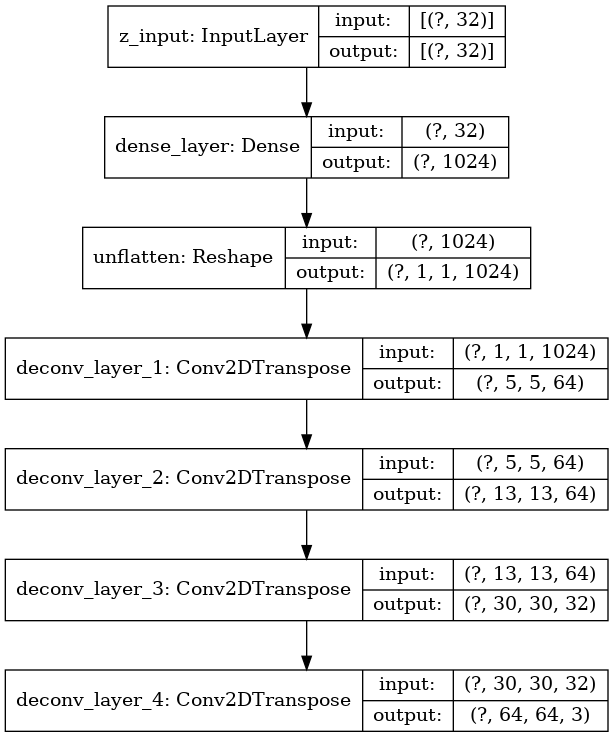

In [5]:
plot_model(vae.encoder, to_file='./vae/encoder.png', show_shapes=True)
plot_model(vae.decoder, to_file='./vae/decoder.png', show_shapes=True)

KeyboardInterrupt: 

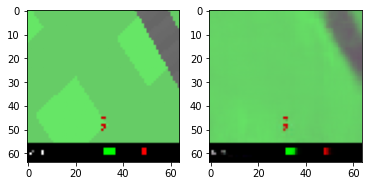

In [6]:
### output from one episode

for idx in range(0,300):
    plt.gca().cla() 
    
    obs = obs_data[idx]
    z_decoded = vae.full_model.predict(np.array([obs]))[0]
    
    plt.subplot(121)
    plt.imshow( obs)
    plt.subplot(122)
    plt.imshow( z_decoded)
    
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 

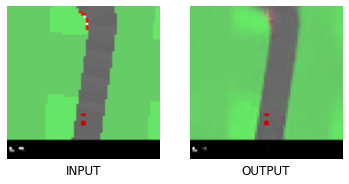

In [7]:
### output from the full_model
DIR_NAME = './data/rollout/'
file = os.listdir(DIR_NAME)[179]
obs_data = np.load(DIR_NAME + file)['obs']

obs = obs_data[50]
reconstruction = vae.full_model.predict(np.array([obs]))[0]

ax1 = plt.subplot(121)
plt.imshow( obs)
ax1.axis('off')
ax1.text(0.5,-0.1, "INPUT", size=12, ha="center", 
         transform=ax1.transAxes)

ax2 = plt.subplot(122)
plt.imshow( reconstruction)
ax2.axis('off')
ax2.text(0.5,-0.1, "OUTPUT", size=12, ha="center", 
         transform=ax2.transAxes);


In [8]:
mus, log_vars, _  = vae.encoder.predict(np.array([obs]))
mu = mus[0]
log_var = log_vars[0]
print("mu = " + str(mu))
print("log_var = " + str(log_var))

encoded_z = vae.encoder.predict(np.array([obs]))[0]
print("z = " + str(encoded_z))

mu = [-0.0191  0.0058  0.0053  0.0048  0.898  -0.0009 -0.0047  0.1349 -1.3451
 -0.5765 -0.0133 -0.0006  0.0198  0.0101  0.1235  0.0025 -0.0074  0.0162
  0.0047  0.0127  0.0112 -0.5354 -0.1173  0.0009  0.0021  0.0094 -0.0075
  1.389  -0.101   0.0004 -0.0015  0.0181]
log_var = [-0.0087  0.0173 -0.0092 -0.0058 -4.9723 -0.0176  0.0026 -0.2451 -4.2373
 -0.5666  0.0054  0.0004 -0.0097 -0.0043 -0.0005  0.0014  0.0063  0.0106
  0.0042  0.0093 -0.0164 -2.6141 -0.1646  0.0098  0.0007 -0.0083 -0.0134
 -1.9802 -1.8274 -0.0172 -0.0162 -0.7425]
z = [[-0.0191  0.0058  0.0053  0.0048  0.898  -0.0009 -0.0047  0.1349 -1.3451
  -0.5765 -0.0133 -0.0006  0.0198  0.0101  0.1235  0.0025 -0.0074  0.0162
   0.0047  0.0127  0.0112 -0.5354 -0.1173  0.0009  0.0021  0.0094 -0.0075
   1.389  -0.101   0.0004 -0.0015  0.0181]]


informative dimensions:


array([ 4,  8,  9, 21, 27, 28, 31])

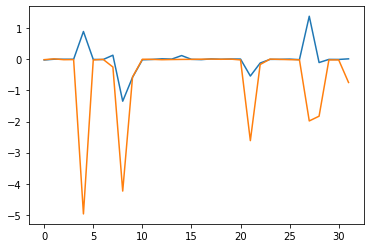

In [9]:
plt.plot(mu);
plt.plot(log_var);
print('informative dimensions:')
hot_zs = np.where(abs(log_var) > 0.5)[0]
hot_zs

In [10]:
file1 = os.listdir(DIR_NAME)[100]
obs_data1 = np.load(DIR_NAME + file)['obs']
file2 = os.listdir(DIR_NAME)[140]
obs_data2 = np.load(DIR_NAME + file)['obs']

In [11]:
vae.encoder.predict(np.array([obs_data1[20]]))

[array([[ 0.0042,  0.0076, -0.0137,  0.0276,  2.1789, -0.0084, -0.0015,
         -0.0171, -0.342 ,  0.0691,  0.0103, -0.0024,  0.0183,  0.0087,
         -0.001 , -0.0034, -0.0041,  0.0128, -0.0003,  0.011 , -0.0072,
         -0.0252, -0.0808, -0.0097,  0.0133,  0.0027, -0.005 , -0.0228,
          0.871 ,  0.0159,  0.0111,  0.1401]], dtype=float32),
 array([[ 0.005 ,  0.0108,  0.0114,  0.0025, -2.5213, -0.0053,  0.0054,
          0.0499, -4.6274,  0.0897, -0.0103, -0.0066,  0.001 , -0.0032,
          0.0475, -0.0109, -0.0041,  0.007 , -0.0029, -0.0004,  0.0023,
         -0.8482,  0.0315,  0.0023,  0.0017, -0.0033,  0.0022, -0.7436,
         -1.1066, -0.0015, -0.0102, -0.022 ]], dtype=float32),
 array([[-0.1157, -0.5816,  0.3751,  0.0872,  2.291 ,  1.6158, -0.1216,
          1.279 , -0.3229,  0.698 , -0.5971, -0.514 , -0.4627, -1.1571,
          0.4897, -0.5934, -1.467 , -1.6157, -0.1735,  1.2516, -0.9627,
         -0.043 , -0.1508, -1.0131, -0.0885, -0.6579, -0.0887,  0.2707,
          

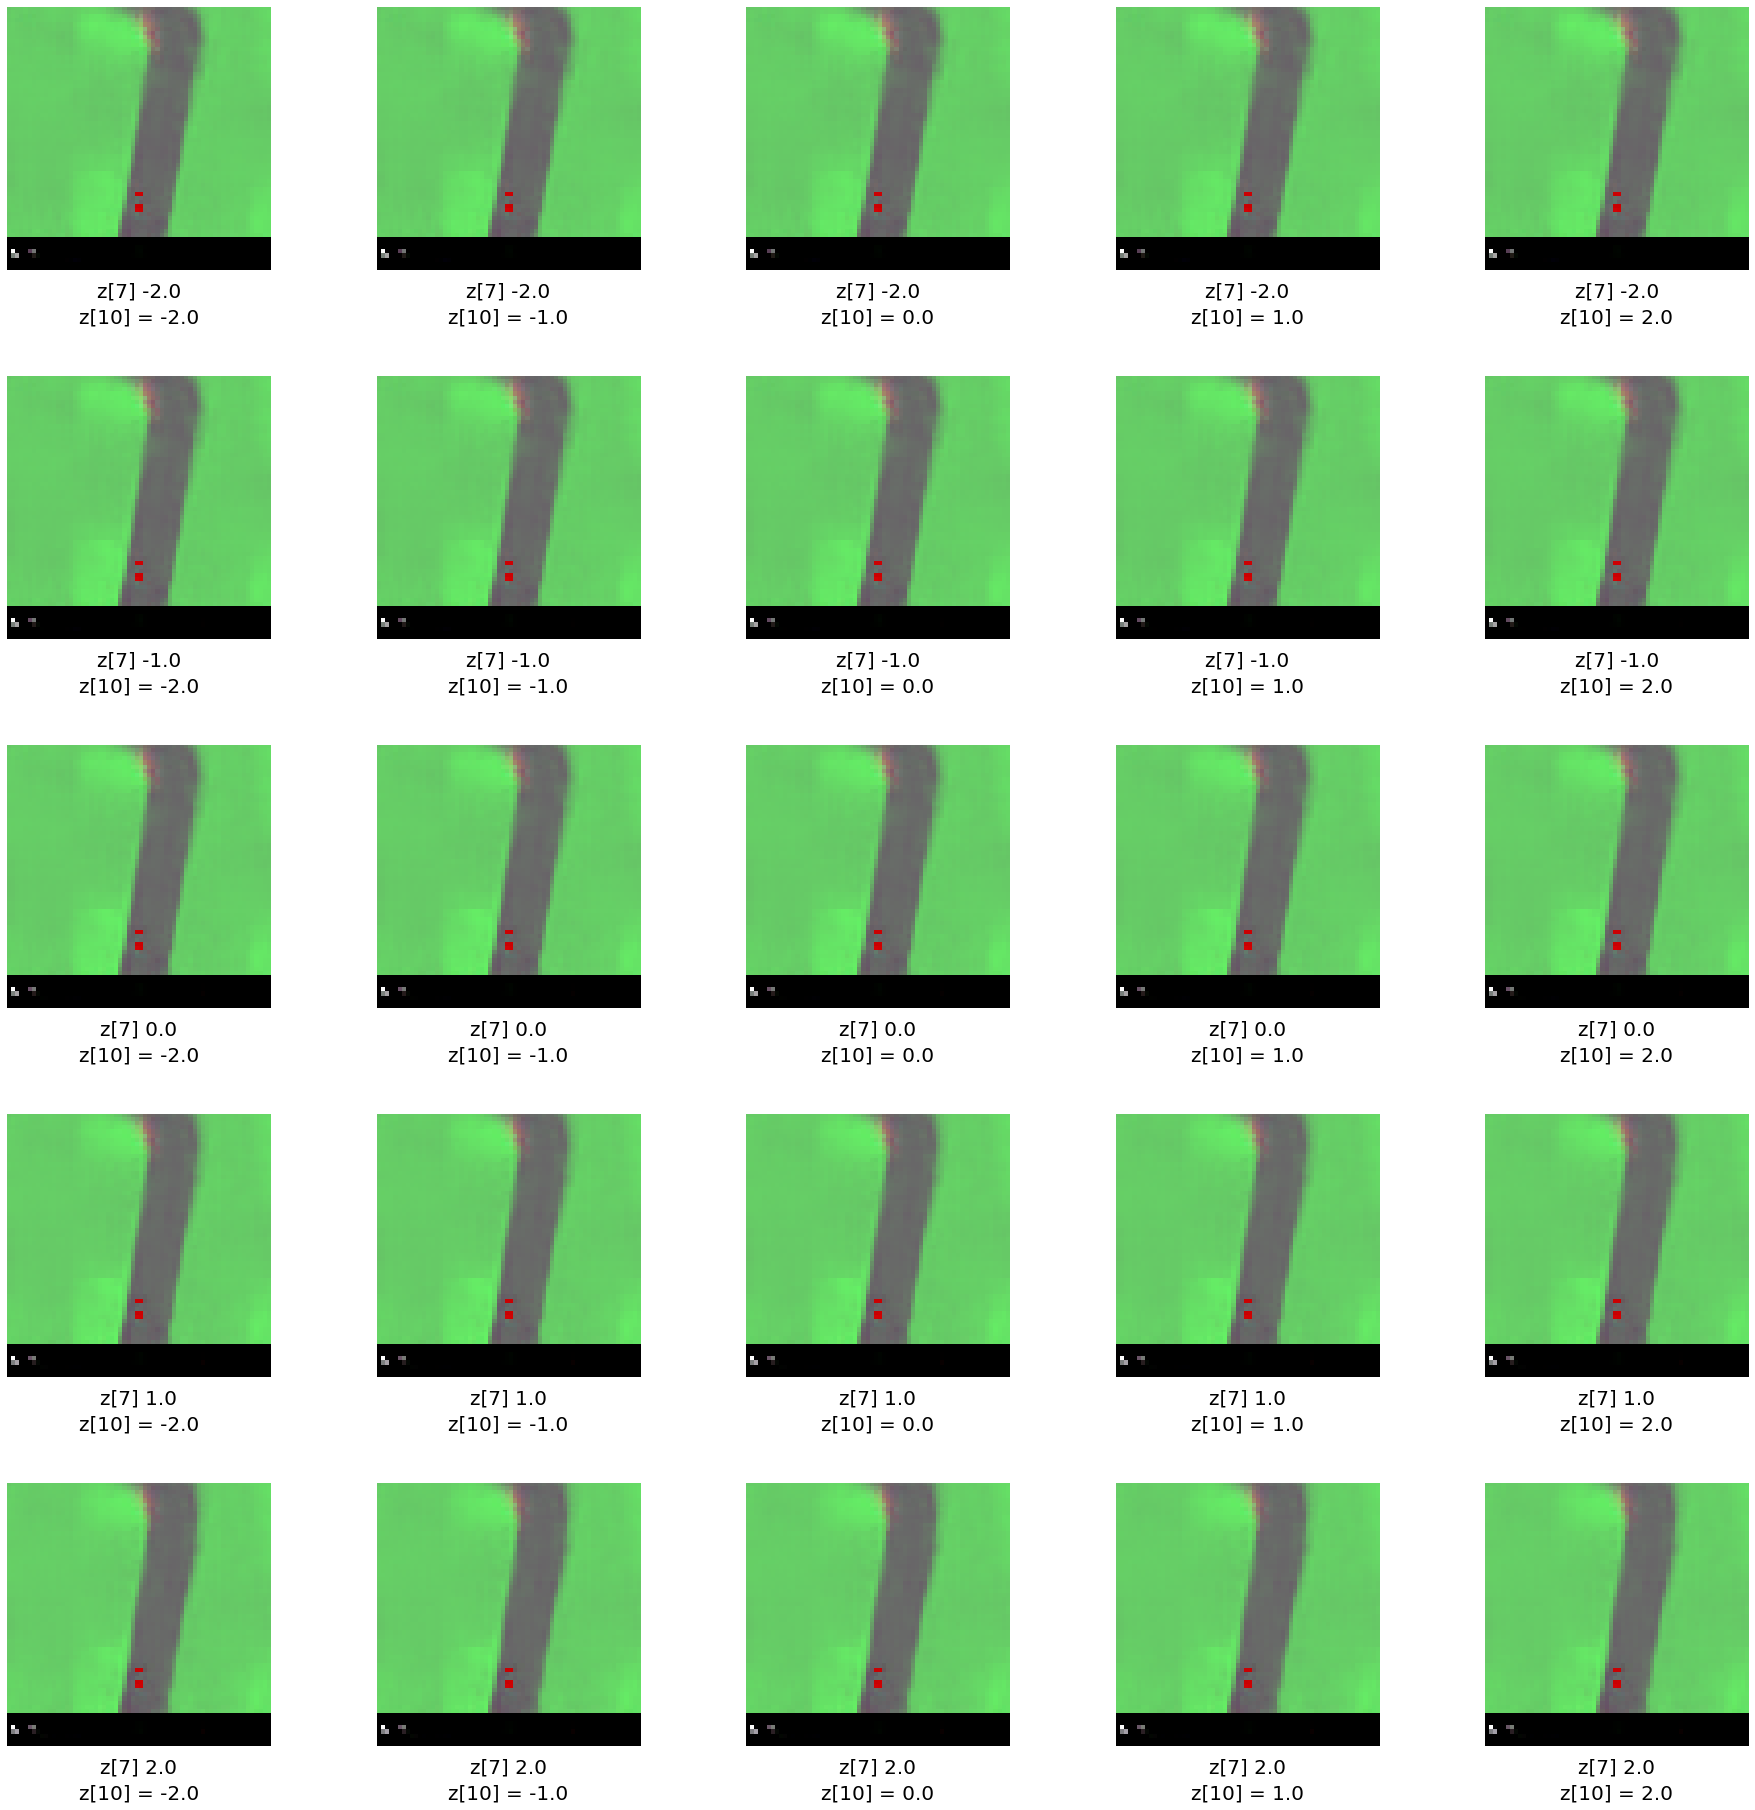

In [12]:
top_left = vae.encoder.predict(np.array([obs_data1[20]]))[2][0]
top_right = vae.encoder.predict(np.array([obs_data1[60]]))[2][0]
bottom_left = vae.encoder.predict(np.array([obs_data2[80]]))[2][0]
sample_z = vae.encoder.predict(np.array([obs_data[60]]))[2][0]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(32,32), sharex=True, sharey=True)
plt.subplots_adjust(hspace = 0.4)

for x in range(5):
    for y in range(5):
        
        z = sample_z.copy()

#         z = top_left + (top_right - top_left) * x/8 + (bottom_left - top_left) * y/8
        z[7] = (x-2)
        z[10] = (y-2)
        
        decoded_obs = vae.decoder.predict(np.array([z]))[0]
        
        axes[x,y].set_axis_off()
        
        axes[x,y].imshow(decoded_obs)
        
        axes[x,y].text(0.5,-0.1, 'z[7] ' + str(np.round(z[7],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
        
        axes[x,y].text(0.5,-0.2, 'z[10] = ' + str(np.round(z[10],2)), size=20, ha="center", 
                       transform=axes[x,y].transAxes)
    

plt.show()

In [13]:
def play_with_z(z0 = sample_z[0]
                ,z2 = sample_z[2]
                ,z4 = sample_z[4]
                ,z5 = sample_z[5]
                ,z6 = sample_z[6]
                ,z7 = sample_z[7]
                ,z10 = sample_z[10]
                ,z15 = sample_z[15]
                ,z24= sample_z[24]
                ,z25= sample_z[25]
                ,z27= sample_z[27]
                ):
    z = sample_z.copy()
    z[0] = z0
    z[2] = z2
    z[4] = z4
    z[5] = z5
    z[6] = z6
    z[7] = z7
    z[10] = z10
    z[15] = z15
    z[24] = z24
    z[25] = z25
    z[27] = z27
    
    decoded_obs = vae.decoder.predict(np.array([z]))[0]
    plt.gca().cla() 
    plt.imshow( decoded_obs)

In [14]:
interact(play_with_z
        , z0=(-3.0,3.0,0.1)
        , z2=(-3.0,3.0,0.1)
        , z4=(-3.0,3.0,0.1)
        , z5=(-3.0,3.0,0.1)
        , z6=(-3.0,3.0,0.1)
        , z7=(-3.0,3.0,0.1)
        , z10=(-3.0,3.0,0.1)
        , z15=(-3.0,3.0,0.1)
        , z24=(-3.0,3.0,0.1)
        , z25=(-3.0,3.0,0.1)
        , z27=(-3.0,3.0,0.1)
        )

interactive(children=(FloatSlider(value=-0.46586766839027405, description='z0', max=3.0, min=-3.0), FloatSlide…

<function __main__.play_with_z(z0=-0.46586767, z2=-2.0469053, z4=0.8189706, z5=1.0792003, z6=0.29230994, z7=1.8642615, z10=-0.38465562, z15=0.76412183, z24=0.050763212, z25=0.05507617, z27=1.5504096)>